# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
print(df.shape)
df.head()

(15, 2)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


###Checking Data Types

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

###Checking There is Any Null Data in Give Data Set

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

###Droping The Duplicates

In [ ]:
df = df.drop_duplicates()

#Exploratory Data Analysis

###Finding Ouliers in Given Data Set By Two Way

###Box Plot Method

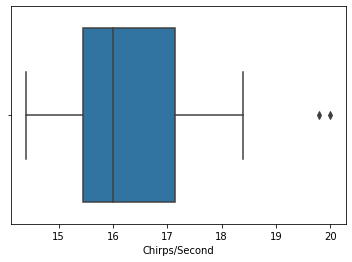

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Chirps/Second"])

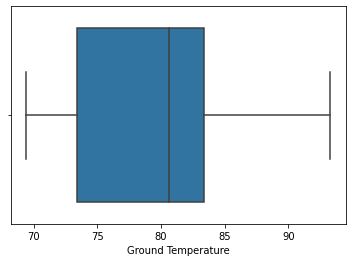

In [ ]:
sns.boxplot(x = df["Ground Temperature"])

### IQR Method

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


###Finding of Interquartile Range And Lower Limit And Upper Limit Method

In [ ]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Chirps/Second is 1.6999999999999993
Lower Limit  12.9
Upper Limit  19.699999999999996
Outlier is Presented In Chirps/Second


Interquartile Range of Ground Temperature is 10.0
Lower Limit  58.400000000000006
Upper Limit  98.4
Outlier is Not Presented In Ground Temperature




###From Above Box Plot And Finding of Interquartile Range We Can Know Outliers Present In Chirps/Second

###To Known Outlier Data Points In Our Feature And Target Variable 

In [ ]:
def Outlier_Data_Points(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + "is")
      for j in outliers[i]:
        print(j)
      print("\n")
Outlier_Data_Points(df)

Outlier is Presented In Chirps/Secondis
20.0
19.8


No Outlier is Presented In Ground Temperature


###Here Only Two Outliers Presented, Thats Not Affect Our Model, So We Can Procced Further

##Finding The Relationship Between The Chirps/Second And Ground Temperature

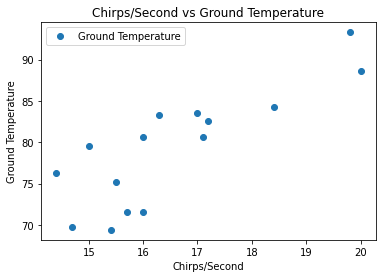

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

df.corr()

###From Scatter Plot And Correlation Values We Can Find That There Is Good Linear Relation Between Chirps/Second and Ground Temperature, So We Can Develop Linear Regression Model

###In This Data Set Less Number Of Data Presents So No Need To Split The Data, We Can Use it Directly

In [ ]:
X = df.loc[:, ['Ground Temperature']].values 
y = df.loc[:, 'Chirps/Second'].values 

#Task 1
##1. Find the linear regression equation for this data.

##Answer is Y = X*M + C
##Y is Our Target Variable, X Is Our Feature , M&C Are The Model Parameters,  M is the Slope, C is Intercept

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X, y)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X) 
y_pred

array([18.44509085, 14.99409541, 19.39918959, 17.572192  , 16.821093  ,
       15.72489445, 14.60839592, 14.99409541, 14.547496  , 17.36919227,
       16.61809327, 17.22709246, 16.821093  , 17.40979222, 15.94819415])

In [ ]:
New_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


In [ ]:
print(regressor.intercept_) # c
print(regressor.coef_) # slope - m

0.45931464523595267
[0.20299973]


##Let Consider X = 15

In [ ]:
M = regressor.coef_
C = regressor.intercept_
Y = M*(15)+C
print(Y)

[3.50431062]


##2. Chart the original data and the equation on the chart.

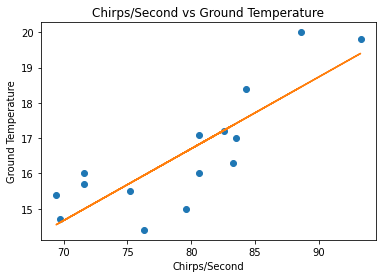

In [ ]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.plot(X, y_pred)

##3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics
y_pred = regressor.predict(X) 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529146998


### The R2 Score Value Of This Model is 0.69 it's Lower Than 0.8

##4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
groundTemp = 95
M = regressor.coef_
C = regressor.intercept_
cricChirping = M*(groundTemp)+C
print(cricChirping)

[19.74428913]


###When Ground Temprature is 95 Then The Approximate Chirping is 19

##5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
X = df.loc[:, ['Chirps/Second']].values 
y = df.loc[:, 'Ground Temperature'].values 

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X, y)

y_pred = regressor.predict(X) 
y_pred

array([91.0554423, 77.4141503, 90.3733777, 85.5989255, 81.1655056,
       75.7089888, 72.9807304, 76.3910534, 75.3679565, 78.4372472,
       74.0038273, 81.5065379, 77.4141503, 80.8244733, 71.9576335])

In [ ]:
cricChirping = 18
M = regressor.coef_
C = regressor.intercept_
groundTemp = M*(cricChirping)+C
print(groundTemp)

[84.2347963]


### When Chirping is 18 Then The Approximate Ground Temprature is 84.2